# Gen App Builder - Enterprise Search - Technical Deep Dive - Lab Exercise

The purpose of this lab is to explore the use of the client libraries and APIs in Gen App Builder and the Langchain LLM integrations and retrievers for Enterprise Search and Vertex AI.

You'll use these tools to build a question and answer service that takes a user query, retrieves relevant documents from a search data store in Gen App Builder, then returns an LLM-generated answer to the original query along with source documents that were used to generate the answer.

Helpful resources for the lab coding exercise:

- [Gen App Builder Code Samples (Documentation)](https://cloud.google.com/generative-ai-app-builder/docs/samples)
- [Question Answering Over Documents (GitHub)](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gen-app-builder/retrieval-augmented-generation/examples/question_answering.ipynb)
- [Grounding Generative AI using Enterprise Search Results (Colab)](https://colab.research.google.com/drive/174YYPNNy1rWdIFvV-_LWZ-cueRB7Q6EC?resourcekey=0-9bYTUjXMbEkHIuduaNjNJw&usp=sharing)
- [Gen App Builder - Search Web App (GitHub)](https://github.com/GoogleCloudPlatform/generative-ai/tree/main/gen-app-builder/search-web-app)

# Coding exercise (Technical asset)

## Step 1

Follow the steps to [create a unstructured data search app that uses the Alphabet Investors PDFs data](https://cloud.google.com/generative-ai-app-builder/docs/try-enterprise-search#create_and_preview_an_unstructured_data_search_app)

DONE :)

## Step 2

Install the Enterprise Search, Vertex AI, and Langchain 0.0.236 (newer versions are broken as of 2023-08-10) client libraries for Python:

In [ ]:
# Install packages
# Note: You might need to restart the runtime after installing these packages
!pip install google-cloud-discoveryengine google-cloud-aiplatform langchain==0.0.236 "shapely<2.0.0" -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.6/523.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 98.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.0/321.0 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.8 MB/s eta 0:00:00


**RESTART RUNTIME!!!**

In [ ]:
import os
import sys

if "google.colab" in sys.modules:
    from google.colab import auth as google_auth

    google_auth.authenticate_user()

In [ ]:
from os.path import basename
from typing import Dict, List, Optional, Tuple, Any

## Step 3

Use the [Enterprise Search document retriever in LangChain](https://python.langchain.com/docs/integrations/retrievers/google_cloud_enterprise_search) to retrieve documents from your data store based on a query.

Sample query: “What are Alphabet's social and environmental impact?”

In [ ]:
#PROJECT_ID = "genai-testing-jhe"
PROJECT_ID = "cloud-llm-preview1"
LOCATION = "us-central1"
#DATA_STORE_ID = "alphabet-investors-pdfs_1694103041665"
DATA_STORE_ID = "gen-app-b-searchengine_1692782239999"

In [ ]:
from google.cloud import discoveryengine_v1beta as discoveryengine
from langchain.retrievers import GoogleCloudEnterpriseSearchRetriever as EnterpriseSearchRetriever

QUERY = "What are Alphabet's social and environmental impact?"

# Code your solution here

# Initialise an Enterprise Search Retriever
retriever = EnterpriseSearchRetriever(
    project_id=PROJECT_ID,
    search_engine_id=DATA_STORE_ID,)
    #max_documents=3, #opt
    #max_extractive_answer_count=3, #opt
    #get_extractive_answers=True,) #opt

# Get relevant documents
result = retriever.get_relevant_documents(QUERY)
for doc in result:
    print(doc)


page_content='Project selection and reporting\n\nA committee consisting of representatives from Alphabet’s Sustainability,\nTreasury, and Finance teams evaluated a broad array of projects from\nacross the company to identify Eligible Projects. The final allocation\nof net proceeds to Eligible Projects was reviewed and approved by\nGoogle’s Chief Sustainability Officer. Projects were selected based on\nthe following factors:\n˦ Consistency with eligibility criteria\n˦ Alignment with our sustainability strategy\n˦ Magnitude of environmental or social impact\n˦ Ability to track and audit project expenditures, contractual\ncommitments, and/or capital commitments\nTo ensure transparency and alignment with our Framework, we\ncommitted to reporting annually on which projects have been funded\nfrom the bonds’ net proceeds and their expected sustainability impact.\nInformation contained in this Sustainability Bond Impact Report is not\nincorporated in, and is not part of, any report or filing w

## Step 4

Given a search query, use [Langchain's LLM integration with Vertex AI](https://python.langchain.com/docs/integrations/llms/google_vertex_ai_palm) to send a search query and return an answer with source documents

Hint: Use [RetrievalQAWithSourcesChain](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gen-app-builder/retrieval-augmented-generation/examples/question_answering.ipynb) and refer to the “Helpful resources” at the top of this notebook!

Sample query: “Who is the CEO of DeepMind?”

In [ ]:
import vertexai
from langchain.llms import VertexAI
from langchain.retrievers import GoogleCloudEnterpriseSearchRetriever

# Code your solution here
from langchain.chains import LLMChain
from langchain import PromptTemplate
import vertexai
vertexai.init(project=PROJECT_ID, location=LOCATION)

In [ ]:
QUERY = "Who is the CEO of DeepMind?" #@param {type: "string"}

In [ ]:
#Initialise LLM
LLM_MODEL = "text-bison@001" #@param {type: "string"}
MAX_OUTPUT_TOKENS = 1024 #@param {type: "integer"}
TEMPERATURE = 0.2 #@param {type: "number"}
TOP_P = 0.8 #@param {type: "number"}
TOP_K = 40 #@param {type: "number"}
VERBOSE = True #@param {type: "boolean"}
llm_params = dict(
    model_name=LLM_MODEL,
    max_output_tokens=MAX_OUTPUT_TOKENS,
    temperature=TEMPERATURE,
    top_p=TOP_P,
    top_k=TOP_K,
    verbose=VERBOSE,
)

llm = VertexAI(**llm_params)

In [ ]:
# Combine the LLM with a prompt to make a simple chain
PROMPT_STRING = "Please parse these search results and summarize them to the answer the following question. Results:{results}. Question:{query}. Answer:"
prompt = PromptTemplate(input_variables=['results', 'query'],
                        template=PROMPT_STRING)
chain = LLMChain(llm=llm, prompt=prompt, verbose=True)

# Get relevant documents
documents = retriever.get_relevant_documents(QUERY)
content = [d.page_content for d in documents]

# Use the LLM-prompt chain to answer the question based on the results
result = chain.run({'results': content, 'query': QUERY})

result.split('\n')



> Entering new LLMChain chain...
Prompt after formatting:
Please parse these search results and summarize them to the answer the following question. Results:['18\n\nGoogle Cloud 1Q23\n\n©2023 Technology Business Research, Inc.\n\nAppendix: Organizational Chart\n1Q23 Alphabet corporate organizational chart\n\nJohn L. Hennessy\nChairman\n\nRuth Porat\nSVP & CFO\n\nHalimah DeLaine Prado\nGeneral Counsel\n\nGoogle Inc.\nCEO: Sundar\nPichai\n\nCalico\nCEO: Arthur\nLevinson\n\nAccess\nCEO: Dinesh Jain\n\nGV\nManaging Partner\n& CEO: David Krane\n\nX\nCEO: Astro Teller\n\nCapitalG\nPartner: David\nLawee\n\nVerily\nCEO: Stephen\nGillett\n\nAlphabet Inc.\n\nSidewalk Labs\nCEO: Dan\nDoctoroff\n\nWaymo\nCo‐CEOs:\nTekedra\nMawakana and\nDmitri Dolgov\n\nDeepMind\nCEO: Demis\nHassabis\n\nSundar Pichai\nCEO', "Alphabet is a holding company that owns Google, Calico, DeepMind, GV,\nCapitalG, X, and Nest. Google is the largest subsidiary of Alphabet and\ngenerates the majority of its revenue. In 2022

['Demis Hassabis is the CEO of DeepMind.']

# Questions and answers (Use case asset)

### **Question 1**

What are the pros and cons of using Langchain vs. the native client libraries for Vertex AI and Enterprise Search?

### **Answer 1**

As for Bard 😉:
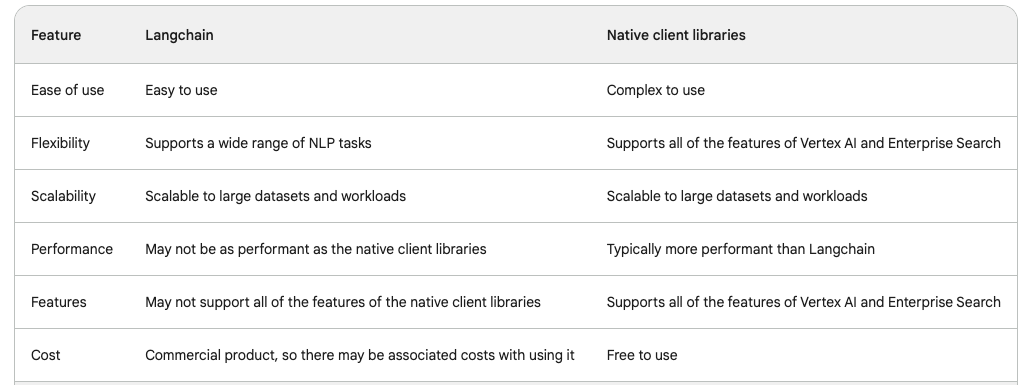

In my opinion, the main advantage of langchain is the ease of use and the big amount of integrations with other LLMs, databases and products. By using the native libraries we limit ourselves to our own coding and developing capabilities. However, the main disadvantage is that as Bard says, langchain might not support all the native libraries capabilities. At least from the very beginning when they launch.

### **Question 2**

In the lab coding exercise, what is the benefit of using a Langchain retriever with Enterprise Search in the chain as opposed to just asking an LLM directly?

### **Answer 2**

By using the ES retriever we ground our answer in the context of the documents uploaded to the data store, reducing the risk of hallucination.

### **Question 3**

What are the benefits and risks of using a custom/DIY approach with Langchain on top of Enterprise Search?

### **Answer 3**

Some of the benefits could be that with a DIY approach with Langchain we can increase customization, add other sources and implement custom code for different tasks. The risks could be an increased complexity vs the out-of-the-box ES experience, introducing errors / bias in our custom code and prompts thus reducing the reliablity of the tool and also depending on open source libraries that might experience changes and risk our production environments.